    Unnamed: 0                 Time  State  Confirmed  Recovered  Deaths  \
0            0  2021-04-22 22:46:02  Delhi     930179     831928   12887   
1            1  2021-04-22 23:54:36  Delhi     956348     851537   13193   
2            2  2021-04-23 23:24:43  Delhi     980679     875109   13541   
3            3  2021-04-24 23:24:30  Delhi    1004782     897804   13898   
4            4  2021-04-25 22:29:17  Delhi    1027715     918875   14248   
..         ...                  ...    ...        ...        ...     ...   
85          85  2021-07-11 19:02:20  Delhi    1435083    1409325   25015   
86          86  2021-07-12 19:58:16  Delhi    1435128    1409417   25018   
87          87  2021-07-14 13:56:28  Delhi    1435204    1409501   25020   
88          88  2021-07-14 18:39:07  Delhi    1435281    1409572   25021   
89          89  2021-07-15 19:34:29  Delhi    1435353    1409660   25022   

    Active  New Cases  
0    85364        NaN  
1    91618    26169.0  
2    92029    2

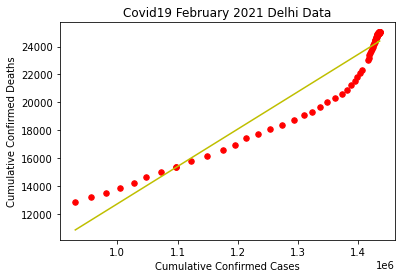

Intercept value =  [-14037.2764932]
Slope value =  [0.02677429]
r2 value =  0.9313659523193988
Standard Error of regression slope =  [0.00077479]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Demonstrating Simple Linear Refression with 1 independent variable

df=pd.read_csv("data-Delhi.csv")

print(df)

X = np.array(df['Confirmed']).reshape(-1, 1)
y = np.array(df['Deaths']).reshape(-1, 1)

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
r2=reg.score(X, y)
coef=reg.coef_

intc=reg.intercept_

line=intc + coef*X

y_pred = reg.predict(X)

plt.scatter(X,y,color="r",marker="o",s=30)
plt.plot(X,line,color="y")
plt.xlabel('Cumulative Confirmed Cases')
plt.ylabel('Cumulative Confirmed Deaths')
plt.title('Covid19 February 2021 Delhi Data')
plt.show()

#To calculate standard error of regression slope
se = np.sqrt(1/(len(df)-2)*sum((y-y_pred)*(y-y_pred))/sum((X-np.mean(X))*(X-np.mean(X))))

print("Intercept value = ",intc)
print("Slope value = ",coef[0])
print("r2 value = ",r2)
print("Standard Error of regression slope = ",se)





      age     bmi  children
8      37  29.830         2
10     25  26.220         0
17     23  23.845         0
44     38  37.050         1
60     43  27.360         3
...   ...     ...       ...
1294   58  25.175         0
1296   18  26.125         0
1315   18  28.310         1
1318   35  39.710         4
1325   61  33.535         0

[125 rows x 3 columns]


Intercept = 
-3809.9095124767628

Coefficients = 
[279.14545162  21.57634111 822.22492955]

r2 score for testing set =  0.3110662695971691


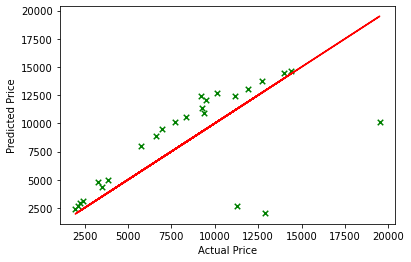

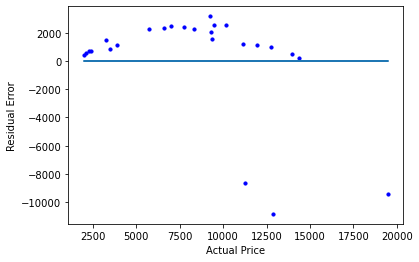



[13736.17127083  2375.62672732 10910.25008812  8913.99459572
 10122.33122643  2642.47366451 13034.39769918  2954.41515463
  2059.20660796 10572.46928622 12719.86673361 12381.81818526
  7997.10193108 11334.06480208  9475.03781125 14454.72198617
  4337.30417526 14625.23056028  2647.75976324  3124.92372874
  4770.72078037 10105.87751819 12385.70140246  4955.41702271
 12032.44142879]


Enter age: 45
Enter bmi: 23.55
Enter children: 1

Insurance Price as per users input:
[10081.98357339]


In [5]:
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# set the max columns to none
pd.set_option('display.max_columns', None)

dp=pd.read_csv("insurance.csv")

df=dp
df.drop(df.index[(df['smoker']=='yes')],axis=0,inplace=True)
df.drop(df.index[(df['region']=='southeast')],axis=0,inplace=True)
df.drop(df.index[(df['region']=='southwest')],axis=0,inplace=True)
df.drop(df.index[(df['sex']=='female')],axis=0,inplace=True)
df.drop(df.index[(df['region']=='northwest')],axis=0,inplace=True)
df.drop('region',inplace=True ,axis=1)
df.drop('sex',inplace=True ,axis=1)
df.drop('smoker',inplace=True ,axis=1)
y=df['charges']
X=df.drop(['charges'],axis=1)

print("\n")
print(X)
print("\n")

# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

y_prediction =  LR.predict(x_test)

print('Intercept = ')
print(LR.intercept_)

print('\nCoefficients = ')
print(LR.coef_)

print('\nr2 score for testing set = ', r2_score(y_test,y_prediction))

plt.scatter(y_test,y_prediction,color="g",marker="x",s=30)
plt.plot(y_test,y_test,color="r")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

plt.close()

plt.scatter(y_test,-y_test + LR.predict(x_test),color="blue",marker="o",s=10)
plt.plot(y_test,y_prediction-y_prediction,)
plt.xlabel('Actual Price')
plt.ylabel('Residual Error')
plt.show()

print('\n')
print(y_prediction)

age=input("\n\nEnter age: ")
bmi=input("Enter bmi: ")
chil=input("Enter children: ")
print("\nInsurance Price as per users input:")
print(LR.predict(pd.DataFrame({'age':[age],'bmi':[bmi],'children':[chil]})))

      age     bmi  children      charges  female  no  northeast  northwest  \
0      19  27.900         0  16884.92400       1   0          0          0   
1      18  33.770         1   1725.55230       0   1          0          0   
2      28  33.000         3   4449.46200       0   1          0          0   
3      33  22.705         0  21984.47061       0   1          0          1   
4      32  28.880         0   3866.85520       0   1          0          1   
...   ...     ...       ...          ...     ...  ..        ...        ...   
1333   50  30.970         3  10600.54830       0   1          0          1   
1334   18  31.920         0   2205.98080       1   1          1          0   
1335   18  36.850         0   1629.83350       1   1          0          0   
1336   21  25.800         0   2007.94500       1   1          0          0   
1337   61  29.070         0  29141.36030       1   0          0          1   

      southeast  
0             0  
1             1  
2        

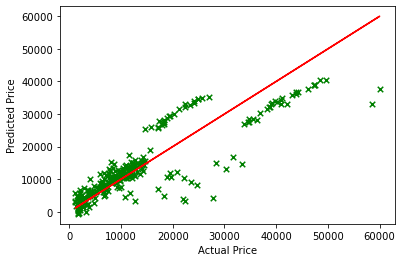

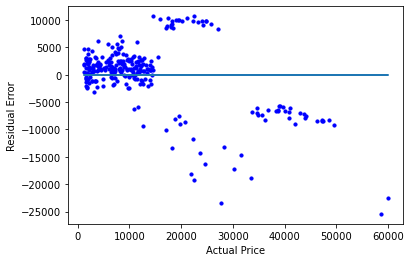



Predicted values for testing set(y_prediction)

[ 4383.68089988 12885.03892192 12589.21653212 13286.22919217
   544.72832757 32117.58400779 12919.04237221 12318.62183013
  3784.29145555 29468.45725408 11002.8139431  17539.69473777
  8681.35471964  8349.04325528  3130.12725504 10445.83896118
  3863.74357865  6944.62510786 15009.63121084 14441.59911874
 12543.65768867 32958.72553095  9072.63608136  8986.85860053
  3022.85773294  8164.97136102  9556.07558002 10743.20363927
  7694.01743692  4373.43771674 14140.93557984  5811.78545062
 34631.91316718 27009.11191231 33348.14098668  9532.96786929
 30421.65017927 26648.91186842 15157.78333287 33895.76121465
  6303.38552088 14059.15156303 10713.4467824  15089.36171493
  4187.95334069 13106.4297513   4336.19603407 28607.05556216
  7243.57117377 14269.4643165  13282.36924936 12329.61280721
  1851.87215658  8876.2837892  26089.18341811 10125.8221046
 34218.77265378 14537.70022165  3232.07805794  5889.64309508
  6558.45711628 14952.73214832 26943

In [9]:
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# set the max columns to none
pd.set_option('display.max_columns', None)

dp=pd.read_csv("insurance.csv")

dp=pd.concat([dp,pd.get_dummies(dp['sex'])],axis=1)
dp=pd.concat([dp,pd.get_dummies(dp['smoker'])],axis=1)
dp=pd.concat([dp,pd.get_dummies(dp['region'])],axis=1)

dp.drop('region',inplace=True ,axis=1)
dp.drop('sex',inplace=True ,axis=1)
dp.drop('smoker',inplace=True ,axis=1)
dp.drop('male',inplace=True ,axis=1)
dp.drop('yes',inplace=True ,axis=1)
dp.drop('southwest',inplace=True ,axis=1)

print(dp)

y=dp['charges']
X=dp.drop(['charges'],axis=1)

print("\n")
print(X)
print("\n")

# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

print("\nIntercept = ")
print(LR.intercept_)

print("Coefficients = ")
print(LR.coef_)

y_prediction =  LR.predict(x_test)

print('\nr2 score for testing set = ', r2_score(y_test,y_prediction))

plt.scatter(y_test,(y_prediction),color="g",marker="x",s=30)
plt.plot(y_test,(y_test),color="r")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

plt.close()

plt.scatter(y_test,-y_test + LR.predict(x_test),color="blue",marker="o",s=10)
plt.plot(y_test,y_prediction-y_prediction,)
plt.xlabel('Actual Price')
plt.ylabel('Residual Error')
plt.show()

print('\n')
print('Predicted values for testing set(y_prediction)\n')
print(y_prediction)
